1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414
p-value = 0.0005279431738299246
The probability that in a single year are observed 15 or more hurricanes is  0.0008444930803583883
Reject the null hypothesis, so this number (15) is significantly different.


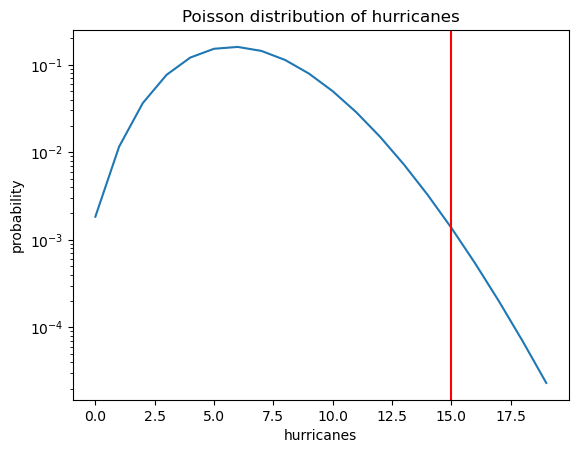

In [1]:
# DONE

import numpy as np
import scipy.stats as stats
from scipy.stats import poisson
import matplotlib.pyplot as plt

hurricanes = 15
av_hurricanes = 6.3 # historic average

sigma = np.sqrt(av_hurricanes)
Z = abs(hurricanes - av_hurricanes) / sigma
print("Z =", Z)

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

p_15or_more = 1-poisson.cdf(k=hurricanes, mu=av_hurricanes) # probability that in a single year are observed 15 or more hurricances
print("The probability that in a single year are observed 15 or more hurricanes is ", p_15or_more)

if (pvalue < p_15or_more):
    print("Reject the null hypothesis, so this number (15) is significantly different.")
else:
    print("Accept the null hypotesis, so so this number (15) is not significantly different.")

k = np.arange(0,20,1)
y = stats.poisson.pmf(k, av_hurricanes, loc=0)
plt.figure()
plt.plot(y)
plt.title('Poisson distribution of hurricanes')
plt.xlabel('hurricanes')
plt.ylabel('probability')
plt.yscale('log')
plt.axvline(x=hurricanes, color = 'red')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
# DONE
# Is the change in blood pressures within our sample statistically significant?
# In other words, we want to know the significance of the difference between the pre test and the post-test blood pressures
# null hypothesis: H0 = pre_mean - post_mean = 0

n = 10

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

x_1 = np.mean(pre)
x_2 = np.mean(post)

sigma = np.sqrt((np.var(pre)+np.var(post))/2)

T = (x_1 - x_2)/(sigma * np.sqrt(2/n))
print("The T test returns:", T)

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.t.cdf(T, n-1) + (1. - stats.t.cdf(-T, n-1))
print("We obtain a p-value of", pvalue)

print("Since p-value < alpha = 0.05, we can conclude that the null hypothesis is not true, so the change in blood pressure is statistically significant.")

The T test returns: -3.991846326292112
We obtain a p-value of 0.0031489409354536393
Since p-value < alpha = 0.05, we can conclude that the null hypothesis is not true, so the change in blood pressure is statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Looking at the plot, we can say that a suitable function might be a Gaussian distribution.
Yes, the fit is reasonable as we can see from the plot.


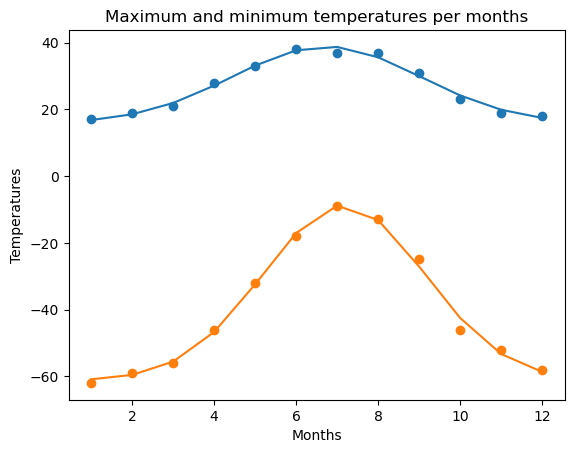

In [3]:
# DONE

from scipy import stats

max_temp = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]

min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# plot temperatures
months = np.linspace(1, 12, 12)
plt.scatter(months, max_temp, label = "max T: data")
plt.scatter(months, min_temp, label = "min T: data")
plt.xlabel("Months")
plt.ylabel("Temperatures")
plt.title("Maximum and minimum temperatures per months")

# find a suitable function
print("Looking at the plot, we can say that a suitable function might be a Gaussian distribution.")

# fit this function to the data
from scipy import optimize

def Gaussian_fun(x, a, b, c,d):
    y_res = (a*np.exp(-(x-b)**2/(2*(c**2))))+d
    return y_res

# fit by means of curve_fit
# max temperatures
params_max, params_cov_max = optimize.curve_fit(Gaussian_fun, months, max_temp) #, p0=[1,1,1,1]

a_max = params_max[0]
b_max = params_max[1]
c_max = params_max[2]
d_max = params_max[3]

fit_max = Gaussian_fun(months, a_max, b_max, c_max, d_max)

#plt.plot(months, max_temp, '*', label='data')
plt.plot(months, fit_max, '-', label='max T: fit')

# min temperatures
params_min, params_cov_min = optimize.curve_fit(Gaussian_fun, months, min_temp, p0=[1,1,1,1])

a_min = params_min[0]
b_min = params_min[1]
c_min = params_min[2]
d_min = params_min[3]

fit_min = Gaussian_fun(months, a_min, b_min, c_min, d_min)

plt.plot(months, fit_min, '-', label='min T: fit')
plt.legend

# Is the fit reasonable?
print("Yes, the fit is reasonable as we can see from the plot.")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

n degrees of freedom = 99
chi2 = 8737.372130853259
p-value = 0.0
Since the p-value is < 0.05, the fit is considered unsatisfactory.


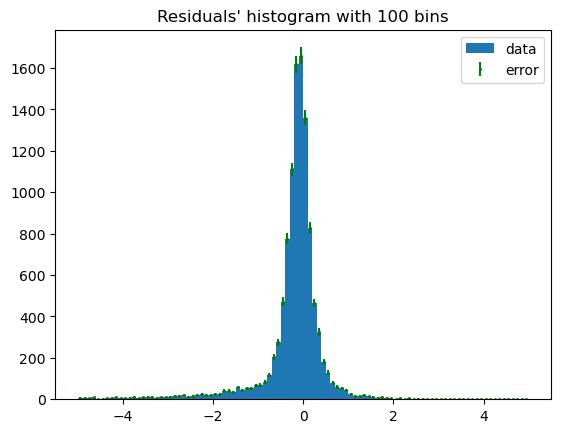

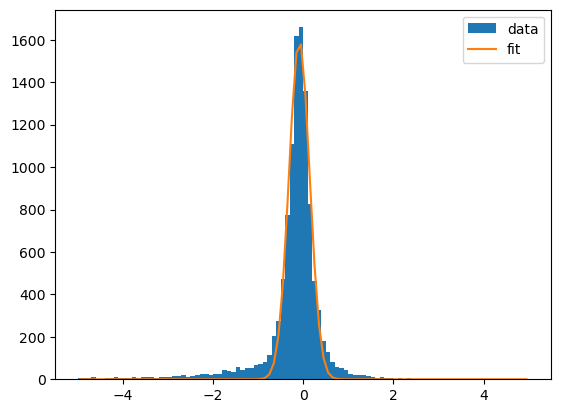

In [4]:
# DONE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit  

data = pd.read_pickle("data/residuals_261.pkl")
data_list = data.tolist()
residuals = data_list['residuals']

# residuals histogram
plt.figure()
plt.title("Residuals' histogram with 100 bins")
[n, bins, patches] = plt.hist(residuals, bins = 100, range = [-5, 5], label='data')
bins_center = (bins + 0.05)[0:100]
# uncertainty for each bin
var_bins = np.sqrt(abs(n))
plt.errorbar(bins_center, n, yerr = var_bins, fmt="sg", markersize=1, label='error') # are we sure?
plt.legend()

# define an appropriate function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*(x-B)**2/(2*(C**2)))
    return y

# compute initial values
mean_residuals = np.mean(residuals)
std_dev_res = np.sqrt(np.var(residuals))

# fit the Gaussian function to the histogram of the residuals
parameters, covariance = curve_fit(Gauss, bins_center, n, p0=[np.max(residuals), mean_residuals, std_dev_res])
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]

plt.figure()
fit_y = Gauss(bins_center, fit_A, fit_B, fit_C)
plt.hist(residuals, bins = 100, range = [-5, 5], label = 'data')
plt.plot(bins_center, fit_y, '-', label='fit')
plt.legend()

# perform a goodness-of-fit test. Is the p-value of the fit satisfactory?
# set the number of degrees of freedom
ndof = len(n) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
chi2 = np.sum((((n - fit_y)**2) / std_dev_res**2))
print("chi2 =", chi2)

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)
if(pvalue < 0.05):
    print("Since the p-value is < 0.05, the fit is considered unsatisfactory.")
else:
    print("Since the p-value is > 0.05, the fit is considered satisfactory.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

The overall average temperature is 8.494733239662965
The mean temperature for the hottest time of the year is 15.280583990916845 °C.
The mean temperature for the coldest time of the year is 0.839737339353188 °C.
The RSS for f is 24678.633916112412
The RSS for g is 24672.37721968847
Test Cubic vs 4-th power:
p-value: 0.497 , additional parameter necessary: NO


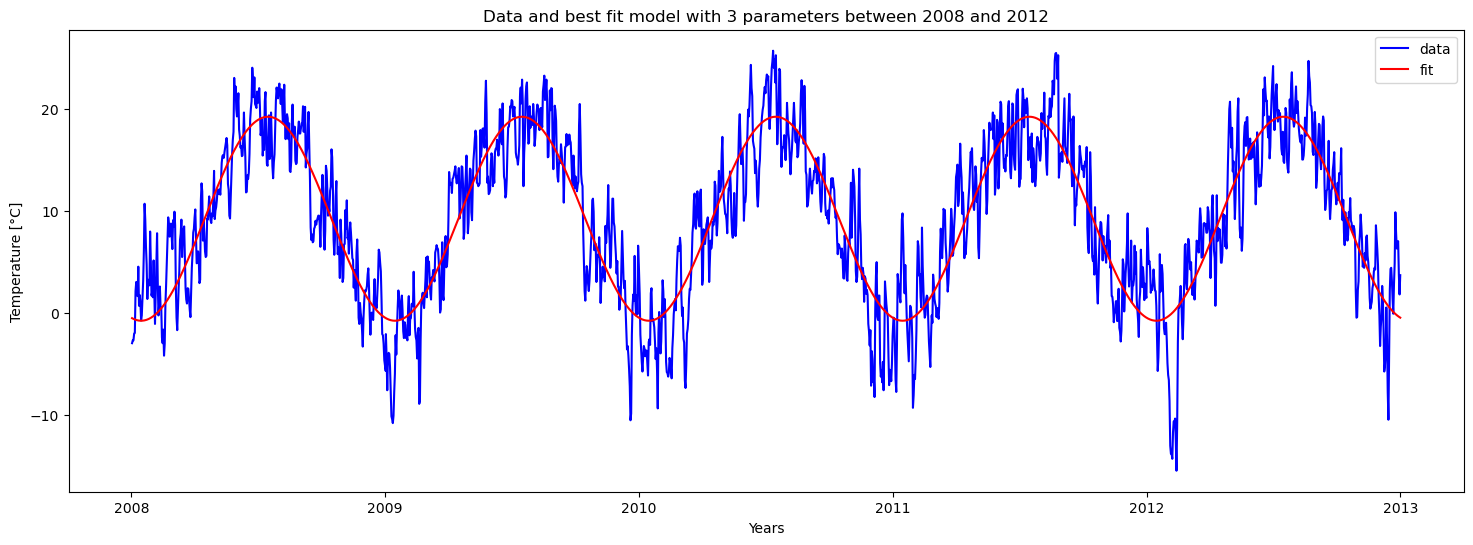

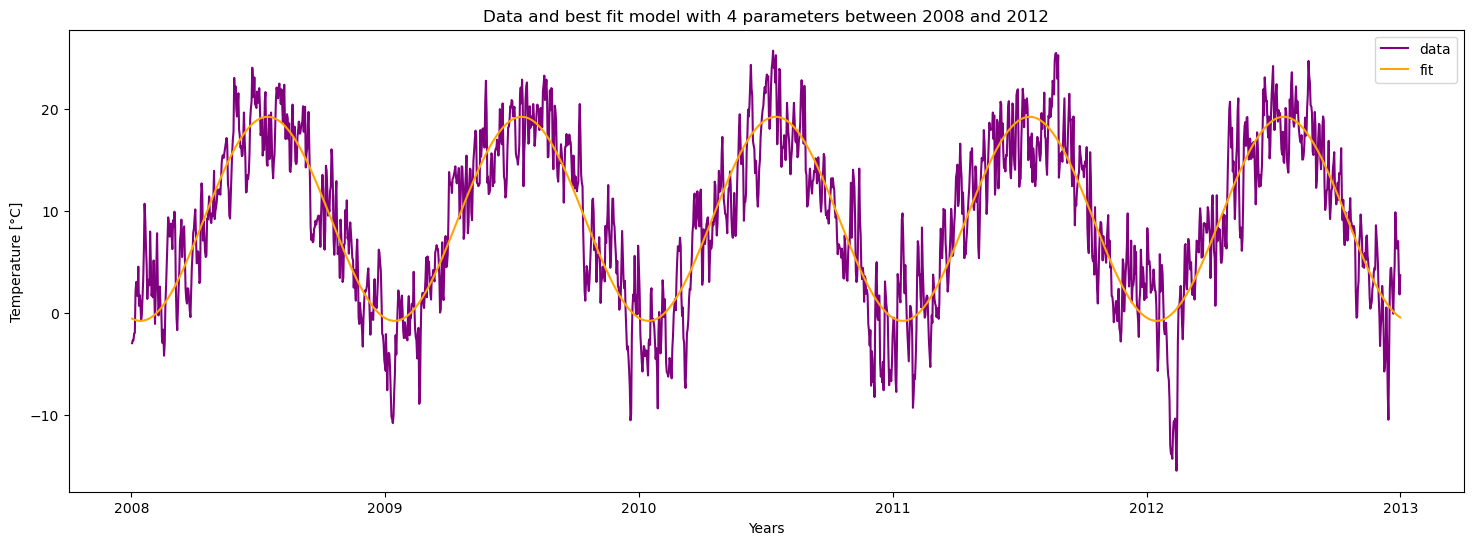

In [5]:
# DONE

#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

data = np.loadtxt("data/munich_temperatures_average_with_bad_data.txt")
df = pd.DataFrame(data)

years = df.iloc[:,0]

filtered_years = years[years>2008][years<2013]

index_min = filtered_years.index[0]
index_max = filtered_years.index[-1]
temperatures = df.iloc[index_min:index_max+1, 1]

# eliminate wrong values
indexes_to_keep = temperatures < 50
temperatures = temperatures[indexes_to_keep]
filtered_years = filtered_years[indexes_to_keep]

def f(t, a, b, c):
    y = a*np.cos(2*np.pi*t+b) + c
    return y

parameters, covariance = curve_fit(f, filtered_years, temperatures)

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]

temp_f = f(filtered_years, fit_A, fit_B, fit_C)

plt.figure(figsize=(18, 6))
plt.plot(filtered_years, temperatures, 'b', label='data')
plt.plot(filtered_years, temp_f, 'r', label='fit')
plt.title("Data and best fit model with 3 parameters between 2008 and 2012")
plt.xlabel("Years")
plt.ylabel("Temperature [°C]")
plt.legend()


# overall average temperature
temp = df.iloc[:,1]
indexes_to_keep = temp < 50
temp = temp[indexes_to_keep]
years = years[indexes_to_keep]
mean_temp = temp.mean()
print("The overall average temperature is", mean_temp)

# typical daily average values predicted by the model for the coldest and hottest time of year
hot_mean = temp[temp > mean_temp].mean()
print("The mean temperature for the hottest time of the year is", hot_mean, "°C.")
cold_mean = temp[temp < mean_temp].mean()
print("The mean temperature for the coldest time of the year is", cold_mean, "°C.")

# b parameter, and what physical sense does it have?
# it is a phase offset in the cosine

# fit the data with the function g(x)
def g(t, a, b, c, d):
    y = a*np.cos(2*np.pi*b*t+c) + d
    return y

parameters, covariance = curve_fit(g, filtered_years, temperatures)

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]

temp_g = g(filtered_years, fit_A, fit_B, fit_C, fit_D)

plt.figure(figsize=(18, 6))
plt.plot(filtered_years, temperatures, 'purple', label='data')
plt.plot(filtered_years, temp_g, 'orange', label='fit')
plt.title("Data and best fit model with 4 parameters between 2008 and 2012")
plt.xlabel("Years")
plt.ylabel("Temperature [°C]")
plt.legend()

# RSS
RSS_f = sum((temperatures - temp_f)**2)
RSS_g = sum((temperatures - temp_g)**2)
print("The RSS for f is", RSS_f)
print("The RSS for g is", RSS_g)

# Fisher F-test
# define alpha
alpha = 0.05 # note that alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

ssr_3 = RSS_f
ssr_4 = RSS_g
ndof_3 = 2
ndof_4 = 3
N = 1826

print("Test Cubic vs 4-th power:")
pval_2_vs_3 = Ftest(ssr_3, ssr_4, ndof_3, ndof_4, N, verbose=True)